## ImageNet-100

ImageNet-100 is a subset of ImageNet-1k Dataset from ImageNet Large Scale Visual Recognition Challenge 2012. It contains random 100 classes as specified in Labels.json file.

## Content

Train(train) Contains 1300 images for each class.

Validation(val) contains 50 images for each class

In [2]:
import os
import json
import torch
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt


In [8]:
root_path = '/kaggle/input/imagenet100/'
labels_path = os.path.join(root_path, 'Labels.json')

# Load class names
with open(labels_path, 'r') as f:
    class_names = json.load(f)

In [9]:
class ImageNet100Dataset(torch.utils.data.Dataset):
    def __init__(self, root_path, folders, transform=None):
        self.transform = transform
        self.image_paths = []
        self.labels = []

        for folder in folders:
            folder_path = os.path.join(root_path, folder)
            for class_dir in os.listdir(folder_path):
                class_path = os.path.join(folder_path, class_dir)
                for img_name in os.listdir(class_path):
                    img_path = os.path.join(class_path, img_name)
                    self.image_paths.append(img_path)
                    self.labels.append(class_dir)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = torchvision.io.read_image(self.image_paths[idx])
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label


In [10]:
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

train_folders = [f'train.X{i}' for i in range(1, 5)]
val_folder = ['val.X']

train_dataset = ImageNet100Dataset(root_path, train_folders, transform=transform)
val_dataset = ImageNet100Dataset(root_path, val_folder, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)


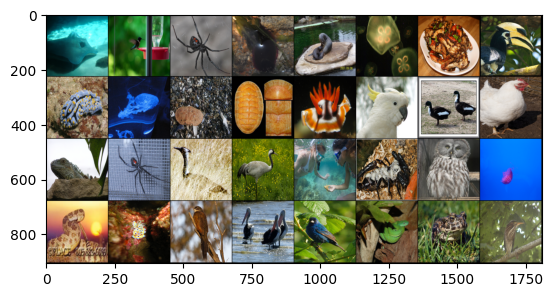

In [12]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

# Get a batch of training data
images, classes = next(iter(train_loader))

# Make a grid from batch and visualize
out = torchvision.utils.make_grid(images)
imshow(out)


In [13]:
print(f"Number of training images: {len(train_dataset)}")
print(f"Number of validation images: {len(val_dataset)}")
print(f"Number of classes: {len(class_names)}")


Number of training images: 130000
Number of validation images: 5000
Number of classes: 100
